In [1]:
%run ../draw_functions.py
%run ../kstest.py

In [2]:
from draw_functions import *
from kstest import *

In [3]:
#read csv
df = pd.read_csv('../csv/MX224010620FR01.csv')

#ajout du slope
df['slope'] = df.groupby('ResultCurve_id').apply(lambda group: group['xvalue'].diff() / group['xtime'].diff(), include_groups=False).reset_index(level=0, drop=True)
df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)]
df

,ResultCurve_id,xtime,xvalue,Batch,Sample_Code,slope
0,CAF727EA-0DE9-4E7D-A12E-09409CFF211F,0.013333,2.045029,204201D,O607GTGH,NaN
1,CAF727EA-0DE9-4E7D-A12E-09409CFF211F,0.023333,1.886850,204201D,O607GTGH,-15.817901
2,CAF727EA-0DE9-4E7D-A12E-09409CFF211F,0.033333,1.751268,204201D,O607GTGH,-13.558201
3,CAF727EA-0DE9-4E7D-A12E-09409CFF211F,0.043333,1.683477,204201D,O607GTGH,-6.779100
4,CAF727EA-0DE9-4E7D-A12E-09409CFF211F,0.053333,1.660880,204201D,O607GTGH,-2.259700
...,...,...,...,...,...,...
1697,C0E952ED-EEA6-45B8-95A2-F1BE518FC98F,1.334400,4.349923,205002D,O607H1FE,0.000000
1698,C0E952ED-EEA6-45B8-95A2-F1BE518FC98F,1.340000,4.349923,205002D,O607H1FE,0.000000
1699,C0E952ED-EEA6-45B8-95A2-F1BE518FC98F,1.370000,4.361221,205002D,O607H1FE,0.376617
1700,C0E952ED-EEA6-45B8-95A2-F1BE518FC98F,1.380000,4.361221,205002D,O607H1FE,0.000000


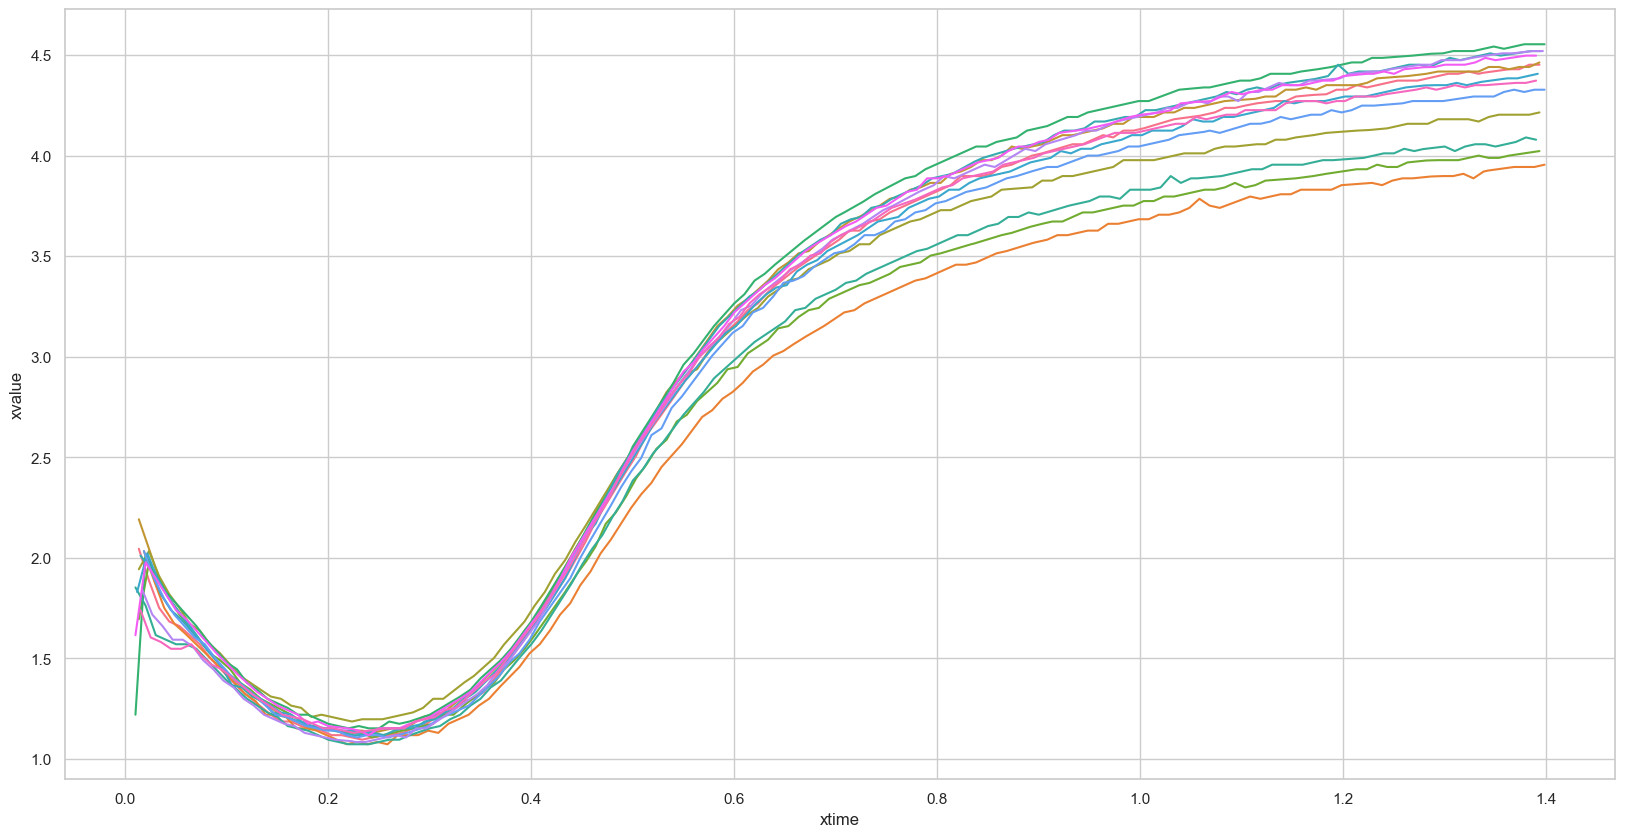

In [26]:
dessiner_commande(df)

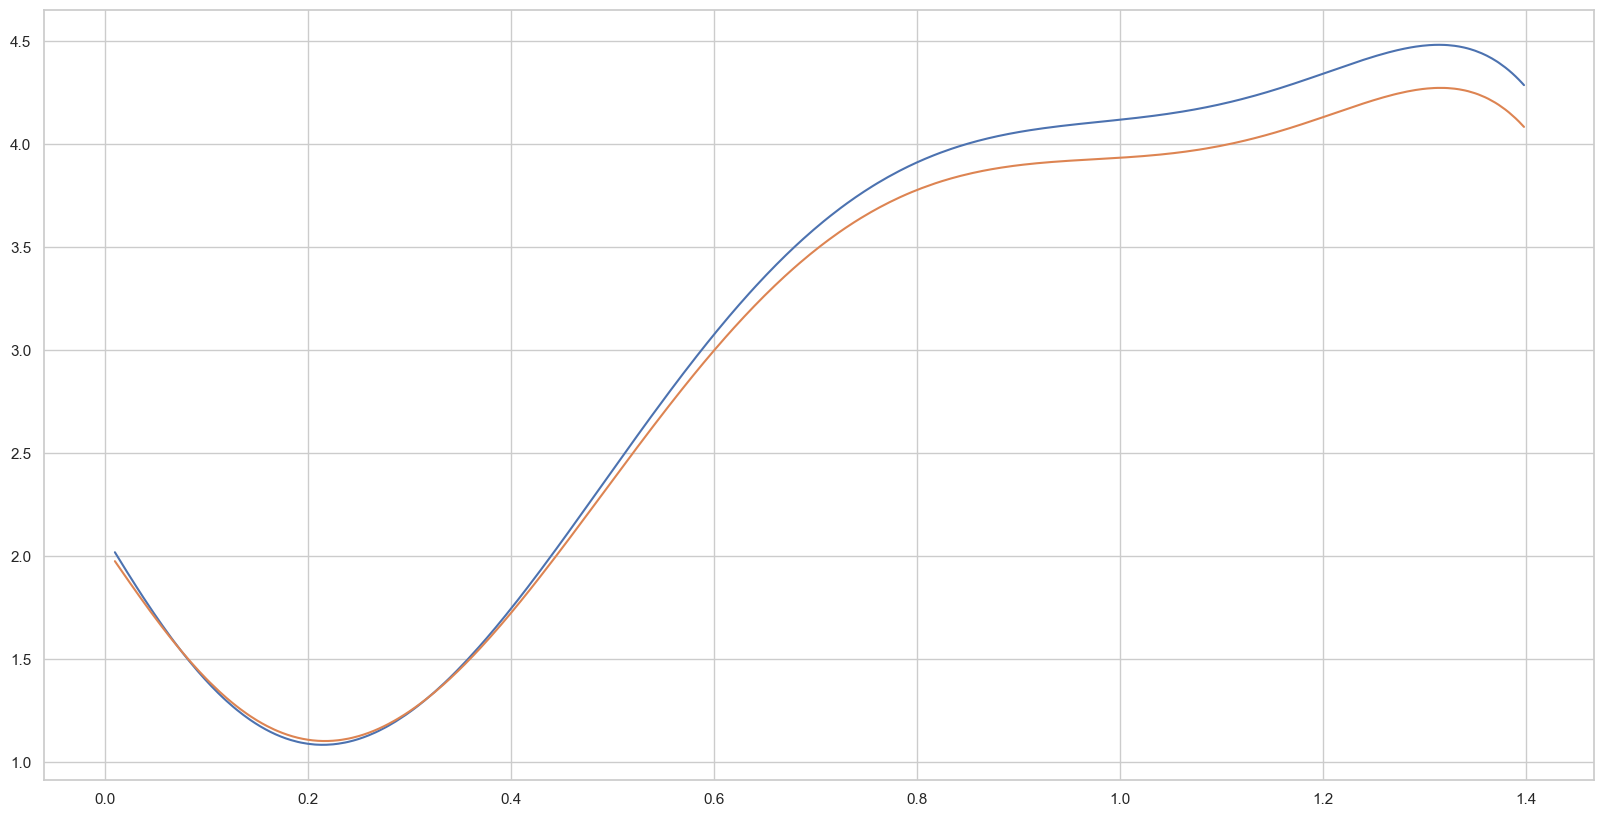

In [27]:
dessiner_commande(df,degree=6)

## Analyse des pentes

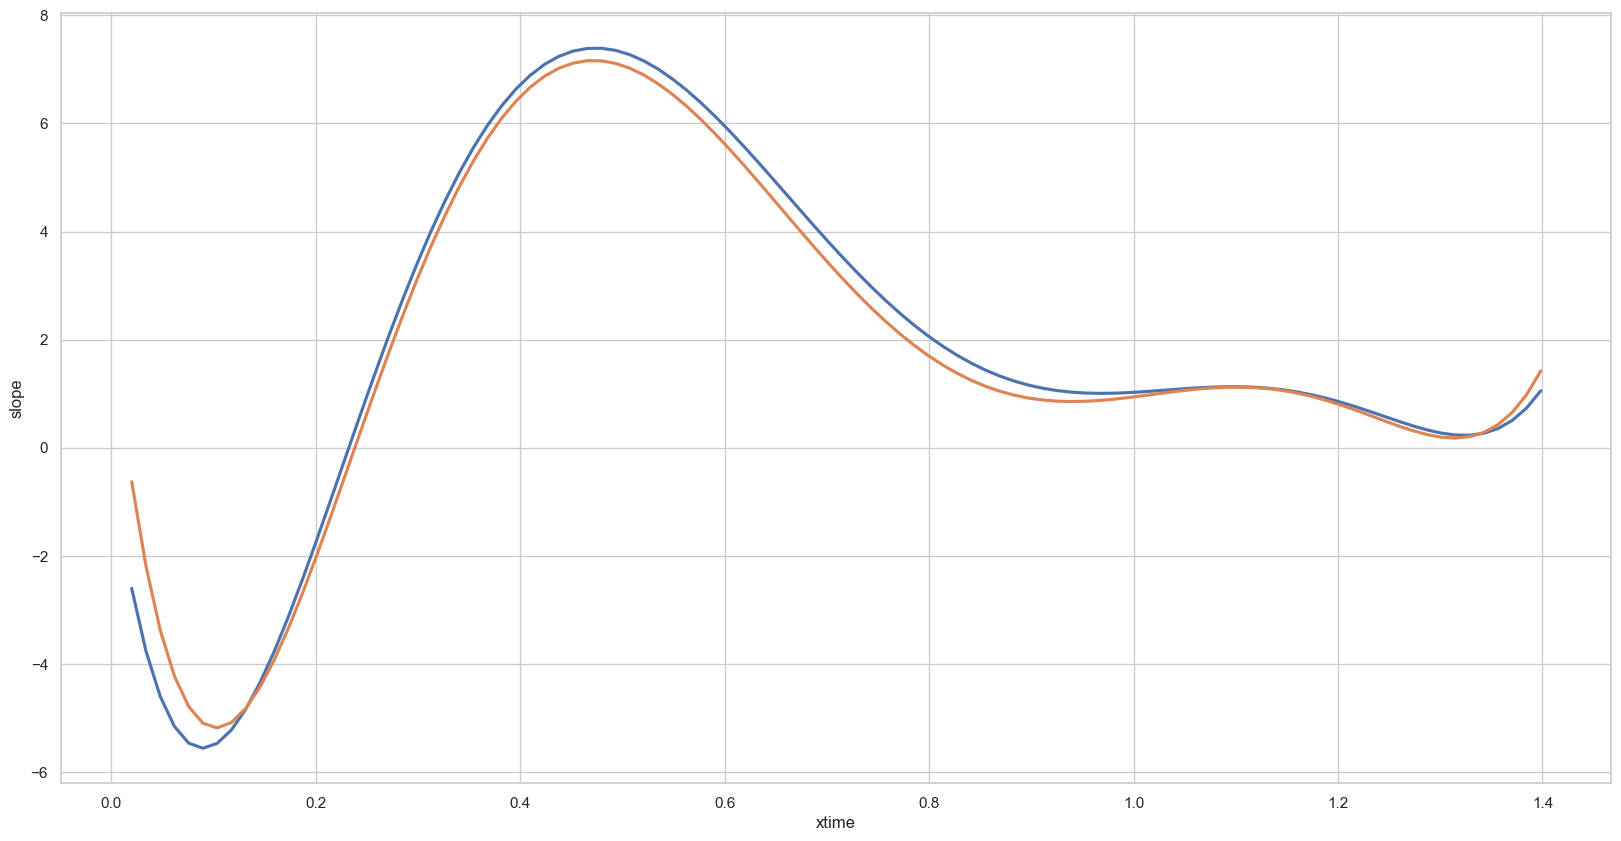

In [28]:
dessiner_commande_slope(df, 6 ,unified=True)

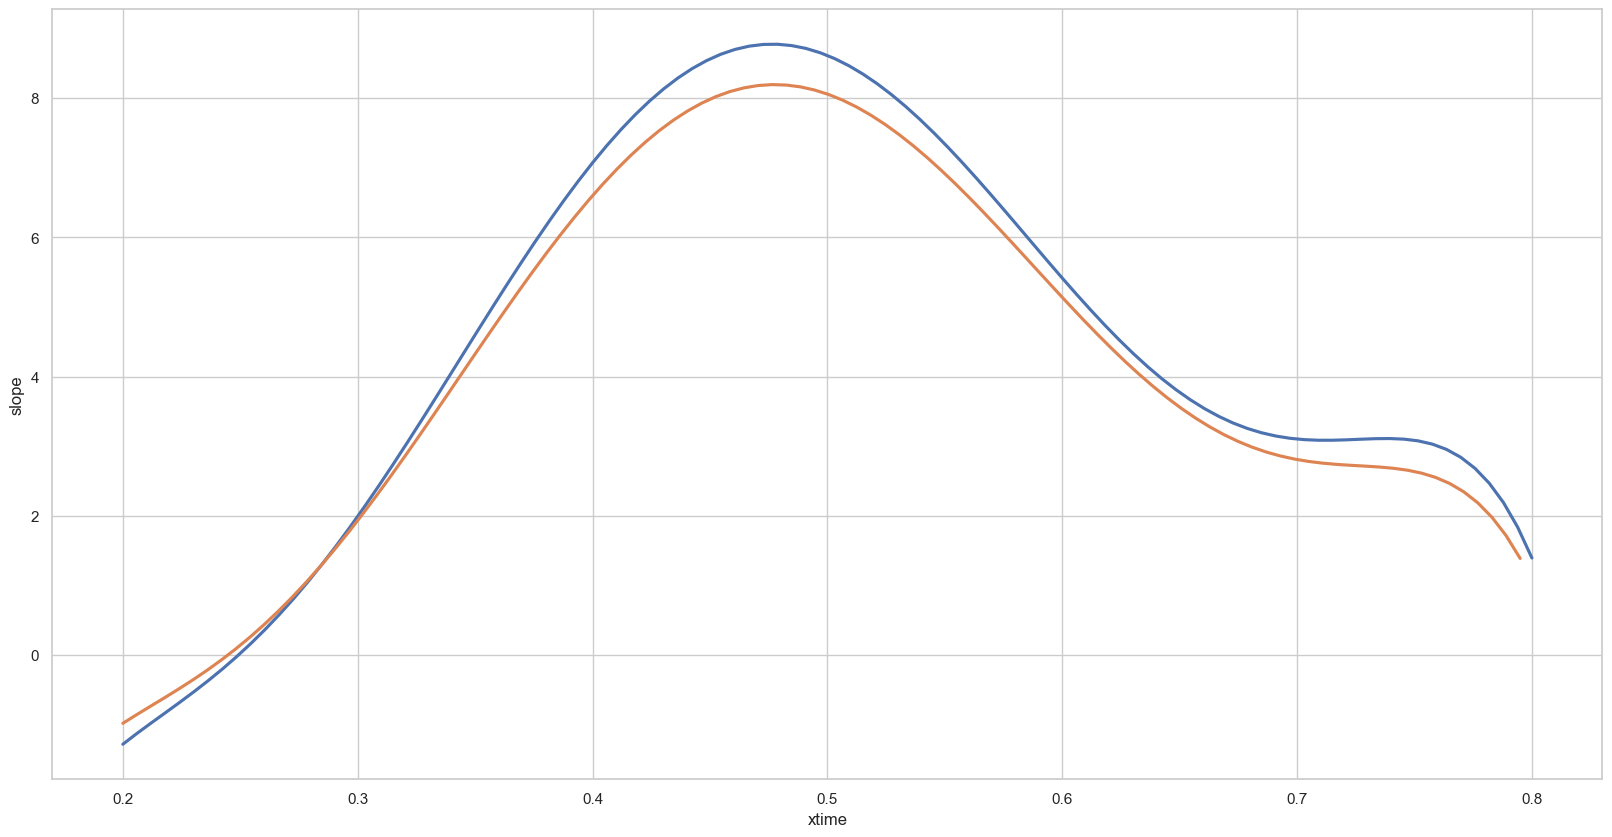

In [29]:
dessiner_commande_slope(df_02_08, 6 ,unified=True)

- Batch 204201D: 10.533785031359075
- Batch 205002D: 10.533785031359075


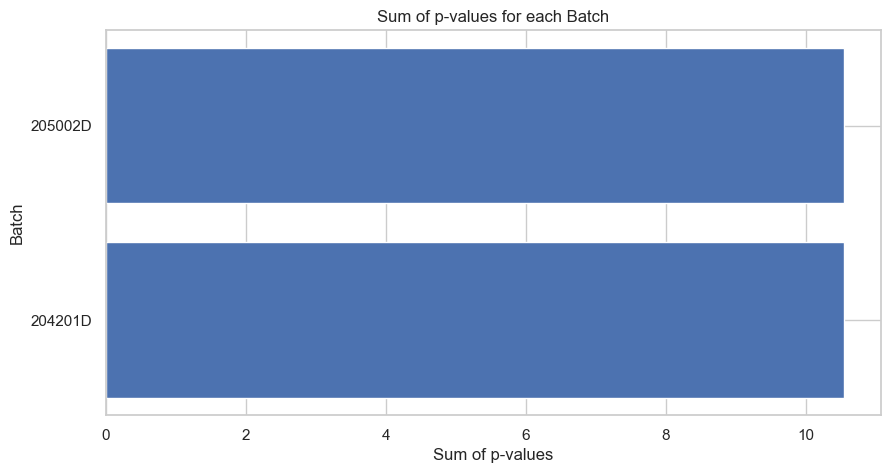

In [34]:
batch_pvalues = ks_test_slope(df, 6)

visualiser_pvalue(batch_pvalues, log=True)

- Batch 204201D: 33.62961446885545
- Batch 205002D: 33.62961446885545


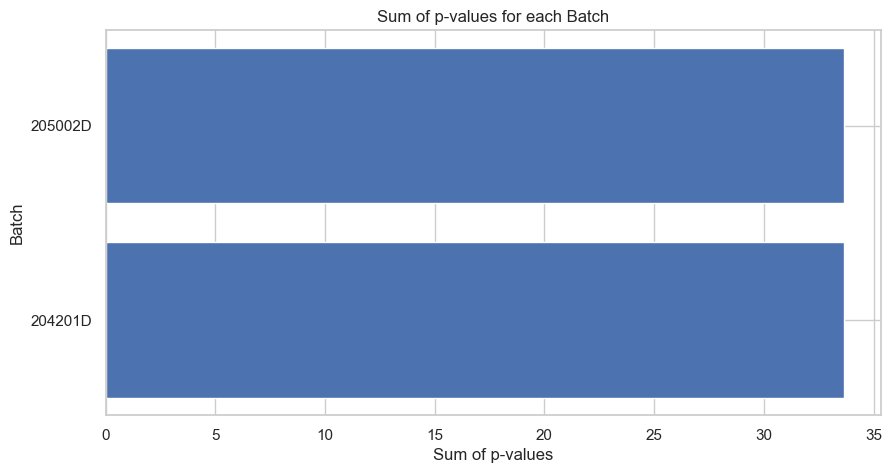

In [35]:
batch_pvalues = ks_test_value(df, 6)

visualiser_pvalue(batch_pvalues, log=True)

In [33]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_xtime = df_02_08.loc[df_02_08.groupby('Batch')['slope'].idxmax()]['xtime']

# Calculer la différence entre le max et le min des xtime
max_diff = max_slope_xtime.max() - max_slope_xtime.min()

print("La plus grande différence de temps entre les max des pentes des différentes batch est :", round(max_diff*60,3), "secondes")

La plus grande différence de temps entre les max des pentes des différentes batch est : 1.242 secondes


In [5]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
max_slope_batch_xtime = max_slope_sample_xtime.groupby('Batch').median()

# Calculer la médiane de xtime pour chaque groupe
median_xtime = max_slope_sample_xtime.median()

# Calculer la différence entre le xtime du max de la pente et la médiane de xtime pour chaque groupe
diff = max_slope_batch_xtime - median_xtime

# Sort the differences by their absolute values in descending order
diff_sorted = diff.abs().sort_values(ascending=False)

# Print the differences in the sorted order
for batch in diff_sorted.index:
    print(f"La différence de temps entre le max de la pente et la médiane pour le batch {batch} est : {round(diff_sorted[batch]*60,3)} seconde")

La différence de temps entre le max de la pente et la médiane pour le batch 204201D est : 0.18 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 205002D est : 0.0 seconde


In [9]:
round(np.std(max_slope_sample_xtime)*1000,2)

24.13

In [10]:
round(np.std(max_slope_batch_xtime)*1000,2)

1.5